In [1]:
import numpy as np
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.linear_model import RidgeCV, Ridge, LassoCV, Lasso, ElasticNetCV, ElasticNet, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd
import matplotlib.pyplot as plt

X_train = np.load('data/x_train.npy')
Y_train = np.load('data/y_train.npy')
X_test = np.load('data/x_test.npy')


In [2]:
df = pd.DataFrame(X_train.copy())
df['price'] = pd.DataFrame(Y_train.copy())

In [3]:
import seaborn as sns
%matplotlib inline

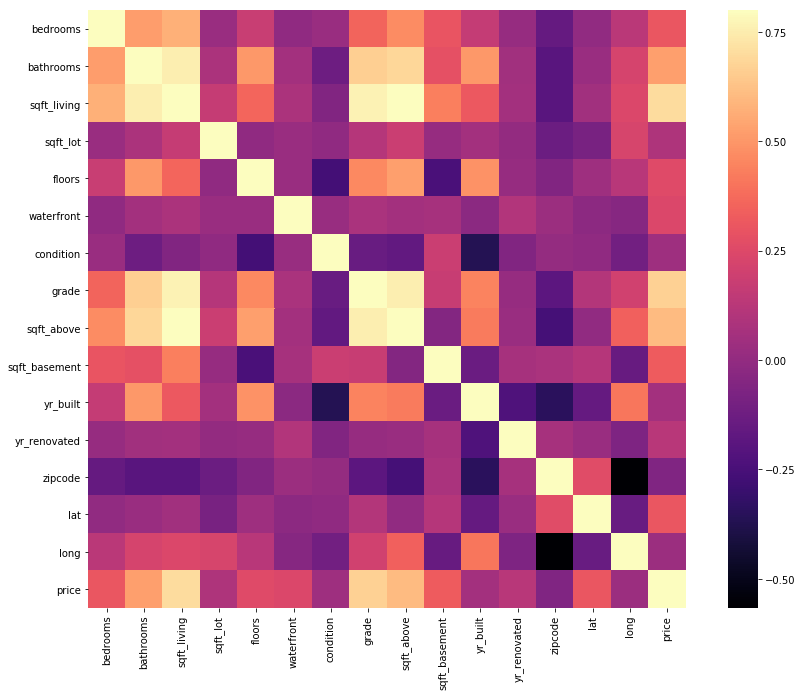

In [4]:
corr = df.corr()
plt.figure(figsize=(15, 11))
sns.heatmap(corr, vmax=.8, square=True, cmap='magma');

In [5]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997,635000.0
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999,456700.0
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998,234000.0
3,2015-04-16,4.0,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.429199,-122.328003,415000.0
4,2014-07-23,3.0,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.607399,-122.293999,552500.0
5,2015-04-24,4.0,2.25,2860,11545,1.0,False,4,8,1430,1430,1966,0,98005,47.588001,-122.167999,957000.0
6,2014-11-20,4.0,3.00,2090,7500,1.0,False,3,7,1370,720,1986,0,98056,47.488800,-122.181999,338000.0
7,2015-04-23,4.0,3.75,3450,4940,2.0,False,3,10,2570,880,2006,0,98103,47.692001,-122.337997,990000.0
8,2014-11-19,3.0,3.00,3490,4500,2.5,False,3,9,3170,320,1924,0,98102,47.639400,-122.320999,1050000.0
9,2014-09-15,3.0,1.75,1300,2446,1.0,False,3,8,880,420,1961,0,98122,47.607101,-122.285004,676500.0


In [6]:
df.drop(['sqft_above', 'zipcode'], 1, inplace=True)
df.drop(['date'], 1, inplace=True)
df['waterfront'] = df['waterfront'].apply(lambda x: int(x))

buftest = pd.DataFrame(X_test.copy())
buftest.drop(['sqft_above', 'date', 'zipcode'], 1, inplace=True)
buftest['waterfront'] = buftest['waterfront'].apply(lambda x: int(x))

In [7]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,price
0,5.0,3.25,3710,34200,2.0,0,3,8,1200,1986,0,47.610100,-122.046997,635000.0
1,3.0,1.75,2820,8879,1.0,0,5,7,1280,1920,1957,47.509399,-122.375999,456700.0
2,3.0,1.00,1240,239144,1.0,0,3,6,0,1921,1992,47.430302,-122.045998,234000.0
3,4.0,2.50,2670,8279,2.0,0,3,7,0,1999,0,47.429199,-122.328003,415000.0
4,3.0,2.25,2700,4025,2.0,0,4,8,940,1907,0,47.607399,-122.293999,552500.0
5,4.0,2.25,2860,11545,1.0,0,4,8,1430,1966,0,47.588001,-122.167999,957000.0
6,4.0,3.00,2090,7500,1.0,0,3,7,720,1986,0,47.488800,-122.181999,338000.0
7,4.0,3.75,3450,4940,2.0,0,3,10,880,2006,0,47.692001,-122.337997,990000.0
8,3.0,3.00,3490,4500,2.5,0,3,9,320,1924,0,47.639400,-122.320999,1050000.0
9,3.0,1.75,1300,2446,1.0,0,3,8,420,1961,0,47.607101,-122.285004,676500.0


In [8]:
'''
from datetime import date
from datetime import datetime
mindate = df.date.min()
Date = datetime.strptime(mindate, "%Y-%m-%d")
#print(Date)
buf = pd.DataFrame()
buf['date'] = df.date.copy()
n = len(buf.date)
buf['intdate'] = buf.date.copy()
buf['intdate'] = buf['intdate'].apply(lambda x: (datetime.strptime(x, "%Y-%m-%d") - date(Date)).days )
#buf1 = buf['intdate'].copy()
#buf1 = buf1.apply(lambda x: (date(x) - date(Date)).days)
buf
'''

'\nfrom datetime import date\nfrom datetime import datetime\nmindate = df.date.min()\nDate = datetime.strptime(mindate, "%Y-%m-%d")\n#print(Date)\nbuf = pd.DataFrame()\nbuf[\'date\'] = df.date.copy()\nn = len(buf.date)\nbuf[\'intdate\'] = buf.date.copy()\nbuf[\'intdate\'] = buf[\'intdate\'].apply(lambda x: (datetime.strptime(x, "%Y-%m-%d") - date(Date)).days )\n#buf1 = buf[\'intdate\'].copy()\n#buf1 = buf1.apply(lambda x: (date(x) - date(Date)).days)\nbuf\n'

In [9]:
y = df.price
df.drop(['price'], 1, inplace=True)
x_train, x_test, y_train, y_test = train_test_split(df, y, train_size=0.8, random_state=42)

/home/fedor/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
train_x, train_y = x_train.copy(), y_train.copy()
test_x = x_test.copy()
train_x['sqft_lot'] = train_x['sqft_lot'] ** 0.05
test_x['sqft_lot'] = test_x['sqft_lot'] ** 0.05

In [11]:
buftest = pd.DataFrame(X_test.copy())
buftest.drop(['sqft_above', 'date', 'zipcode'], 1, inplace=True)
buftest['waterfront'] = buftest['waterfront'].apply(lambda x: int(x))
buftest['sqft_lot'] = buftest['sqft_lot'] ** 0.05

In [12]:
#pairplot(x_train, y_train)

In [13]:
from sklearn.metrics import r2_score

def r2_scorer(estimator, X_test, y_test):
    return r2_score(y_test, estimator.predict(X_test))

def pairplot(df, target):
    ncol, nrow = 7, df.shape[1] // 7 + (df.shape[1] % 7 > 0)
    plt.figure(figsize=(ncol * 4, nrow * 4))

    for i, feature in enumerate(df.columns):
        plt.subplot(nrow, ncol, i + 1)
        plt.scatter(df[feature], target, s=10, marker='o', alpha=.6)
        plt.xlabel(feature)
        if i % ncol == 0:
            plt.ylabel('price')

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('reg', LinearRegression())
])

params = [{
    'reg': [LinearRegression()],
    'scale': [StandardScaler(), MinMaxScaler()]
}, {
    'reg': [Ridge(), Lasso()], 
    'scale': [StandardScaler(), MinMaxScaler()],
    'reg__alpha': np.logspace(-4, 4, 50)
}]

cv = GridSearchCV(pipe, params, cv=4, scoring=r2_scorer)
cv.fit(train_x, train_y)

GridSearchCV(cv=4, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'reg': [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)], 'scale': [StandardScaler(copy=True, with_mean=True, with_std=True), MinMaxScaler(copy=True, feature_range=(0, 1))]}, {'reg': [Ridge(alpha=51.794746792312019, copy_X=True, fit_intercept=True,
   max_it...   1.52642e+03,   2.22300e+03,   3.23746e+03,   4.71487e+03,
         6.86649e+03,   1.00000e+04])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=<function r2_scorer at 0x7f2cb5165f28>, verbose=0)

In [14]:
'''
rid = Ridge(alpha = 0.000001)

rid.fit(train_x, train_y)

buftest = pd.DataFrame(X_test.copy())
buftest.drop(['sqft_above', 'date', 'waterfront'], 1, inplace=True)
p_test = rid.predict(np.array(buftest))

p_test = rid.predict(np.array(x_test))

print('R2 Score\n')
print('For Ridge regularization %.3f\n' % r2_score(y_test, p_test))
'''

"\nrid = Ridge(alpha = 0.000001)\n\nrid.fit(train_x, train_y)\n\nbuftest = pd.DataFrame(X_test.copy())\nbuftest.drop(['sqft_above', 'date', 'waterfront'], 1, inplace=True)\np_test = rid.predict(np.array(buftest))\n\np_test = rid.predict(np.array(x_test))\n\nprint('R2 Score\n')\nprint('For Ridge regularization %.3f\n' % r2_score(y_test, p_test))\n"

In [15]:

cv_grid = pd.DataFrame(cv.cv_results_['params'])
cv_grid['val R2'] = cv.cv_results_['mean_test_score']
cv_grid['reg'] = cv_grid['reg'].apply(lambda x: x.__class__.__name__)
cv_grid = cv_grid.sort_values('val R2', ascending=False)
cv_grid.head()



,reg,reg__alpha,scale,val R2
72,Ridge,51.794747,"StandardScaler(copy=True, with_mean=True, with...",0.671558
70,Ridge,35.564803,"StandardScaler(copy=True, with_mean=True, with...",0.671555
74,Ridge,75.431201,"StandardScaler(copy=True, with_mean=True, with...",0.671550
68,Ridge,24.420531,"StandardScaler(copy=True, with_mean=True, with...",0.671548
43,Ridge,0.184207,"MinMaxScaler(copy=True, feature_range=(0, 1))",0.671544


In [16]:
print(cv.best_params_)

{'reg': Ridge(alpha=51.794746792312019, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001), 'reg__alpha': 51.794746792312019, 'scale': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [17]:
print('Test R2 is %.3f' % r2_scorer(cv, test_x, y_test))

Test R2 is 0.707


In [18]:
res = cv.predict(np.array(buftest))

In [19]:
#RES = pd.DataFrame(res)
n = len(res)
RES = pd.DataFrame(data = res, columns = ['Price'])
RES['Price'] = RES['Price'].apply(lambda x: x if x > 0 else 0)
RES['Id'] = list(range(1, n + 1))
RES = RES.set_index('Id')

In [20]:
RES

,Price
Id,
1,4.505273e+05
2,8.170743e+05
3,9.472775e+05
4,7.797557e+05
5,8.926283e+05
6,2.251328e+05
7,1.057682e+06
8,4.916919e+05
9,7.740150e+05


In [21]:
RES.to_csv('solution-1-Usov.csv')